In [1]:
import xgboost as xgb
import os
import pandas as pd
import numpy as np

import category_encoders as ce
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import model_selection

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [2]:
def smape(actual, predicted) -> float:  
    temporary_smape_nominator = np.abs(np.array(actual) - np.array(predicted))
    temporary_smape_denominator = [np.max(elem) for elem in list(zip(predicted, actual))]

    return float(np.sum(temporary_smape_nominator) / np.sum(temporary_smape_denominator))

def regression_insights(actual, predicted) -> tuple: 
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)

    return mse, rmse, mae, r2

def bias(actual, predicted) -> float:
    return float(np.sum(np.abs(1 - np.array(predicted) / np.array(actual + 0.00000001))))

In [3]:
data = {}

for root, dirs, files in os.walk('../podaci/xgboost/masked_data/'):
    for file in files:
        if file[0:4] == 'year':
            data_raw = pd.read_csv(root + "/"+file)
            data[file.split(".csv")[0][:-7]] = data_raw

In [4]:
data.keys()

dict_keys(['year_week_garage_category_train_on_all_available', 'year_month_garage_make_train_on_all_available', 'year_week_garage_make_train_on_all_available', 'year_week_garage_make_train_on_all_available_202108_weeks_not_fixed', 'year_month_garage_category_train_on_all_available', 'year_week_garage_make_train_on_all_available_202108'])

In [5]:
len(data['year_month_garage_make_train_on_all_available']
    [(data['year_month_garage_make_train_on_all_available']['vehicle_make'] == 'AW')
     & (data['year_month_garage_make_train_on_all_available']['is_training_data'] == False)])
    
    

40

In [6]:
data['year_week_garage_make_train_on_all_available']

,vehicle_make,garage,reachable_population,year,week_of_year,number_of_competitors,x_unit_cost,x_units,demand_value,is_training_data
0,AE,CU,0.557521,2020,48,0.218750,0.741525,2.100000,0.666667,True
1,AE,CX,0.701217,2020,39,0.203125,0.595870,1.966667,0.666667,True
2,AE,DC,1.835690,2020,38,1.578125,1.324153,0.366667,0.666667,True
3,AE,DD,1.089601,2020,45,1.375000,1.101695,2.133333,1.333333,True
4,AE,DT,1.821892,2019,52,1.609375,1.191737,3.033333,0.666667,True
...,...,...,...,...,...,...,...,...,...,...
25799,BI,CS,0.701217,2021,8,0.203125,0.825212,6.600000,3.333333,True
25800,BI,CS,0.701217,2021,9,0.203125,1.006356,2.333333,2.000000,True
25801,BI,CS,0.701217,2021,10,0.203125,1.006356,1.666667,1.333333,True
25802,BI,CS,0.701217,2021,11,0.203125,1.006356,1.666667,1.333333,True


In [7]:
data['year_week_garage_category_train_on_all_available']

,vehicle_category,garage,reachable_population,year,week_of_year,number_of_competitors,x_unit_cost,x_units,demand_value,is_training_data
0,HIGH END,CT,0.335852,2020,23,0.750000,0.893617,1.111111,1.111111,True
1,HIGH END,CT,0.335852,2020,24,0.750000,0.893617,0.444444,0.555556,True
2,HIGH END,CT,0.335852,2020,49,0.750000,0.893617,1.333333,0.555556,True
3,HIGH END,CU,0.561437,2019,51,0.218750,0.984043,0.277778,0.555556,True
4,HIGH END,CU,0.561437,2020,5,0.218750,0.984043,0.416667,0.555556,True
...,...,...,...,...,...,...,...,...,...,...
19759,MEDIUM LOW,CS,0.706142,2021,7,0.203125,0.707447,5.000000,1.666667,True
19760,MEDIUM LOW,CS,0.706142,2021,8,0.203125,0.859043,2.944444,1.111111,True
19761,MEDIUM LOW,CS,0.706142,2021,9,0.203125,1.010638,0.583333,0.555556,True
19762,MEDIUM LOW,CS,0.706142,2021,11,0.203125,1.010638,1.500000,0.555556,True


In [8]:
data['year_month_garage_category_train_on_all_available']

,vehicle_category,garage,year_week,reachable_population,year,month,number_of_competitors,x_unit_cost,x_units,demand_value,is_training_data
0,HIGH END,CT,202023,0.335852,2020,6,0.750000,0.889831,1.176471,1.176471,True
1,HIGH END,CT,202024,0.335852,2020,6,0.750000,0.889831,0.470588,0.588235,True
2,HIGH END,CT,202049,0.335852,2020,12,0.750000,0.889831,1.411765,0.588235,True
3,HIGH END,CT,202114,0.335852,2021,4,0.750000,0.995763,0.941176,0.588235,False
4,HIGH END,CT,202115,0.335852,2021,4,0.750000,0.995763,1.764706,0.588235,False
...,...,...,...,...,...,...,...,...,...,...,...
21729,MEDIUM LOW,CS,202111,0.706142,2021,3,0.203125,1.006356,1.588235,0.588235,True
21730,MEDIUM LOW,CS,202112,0.706142,2021,3,0.203125,1.006356,4.235294,1.764706,True
21731,MEDIUM LOW,CS,202115,0.706142,2021,4,0.203125,1.006356,3.176471,1.176471,False
21732,MEDIUM LOW,CS,202116,0.706142,2021,4,0.203125,1.006356,1.647059,1.176471,False


In [9]:
pd.set_option('display.max_rows', 200)

In [10]:
metrics = {}
target = "demand_value"


for dataset_name, dataset in data.items():
    if dataset_name == "year_week_garage_make_train_on_all_available_202108_weeks_not_fixed":

        covariates = list(dataset.columns)
        covariates.remove(target)
        covariates.remove("is_training_data")
        covariates.remove("x_units")

        X_train = data[dataset_name][
            data[dataset_name]['is_training_data'] == True
        ][covariates]

        X_test = data[dataset_name][
            data[dataset_name]['is_training_data'] == False
        ][covariates]

        y_train = data[dataset_name][
            data[dataset_name]['is_training_data'] == True
        ][target]

        y_test = data[dataset_name][
            data[dataset_name]['is_training_data'] == False
        ][target]

        columns_to_encode = []    
        if 'week' in dataset_name:
            if 'make' in dataset_name:
                columns_to_encode = ['vehicle_make', 'garage', 'year', 'week_of_year']
            else:
                columns_to_encode = ['vehicle_category', 'garage', 'year', 'week_of_year']
        else:
            if 'make' in dataset_name:
                columns_to_encode = ['vehicle_make', 'garage', 'year', 'year_week', 'month']
            else:
                columns_to_encode = ['vehicle_category', 'garage', 'year', 'year_week', 'month']

        model = xgb.XGBRegressor()

        X_train, X_validation, y_train, y_validation = model_selection.train_test_split(
            X_train,
            y_train,
            test_size=0.2,
            #random_state=42
        )  

        target_encoder = ce.TargetEncoder(cols=columns_to_encode)
        target_encoder = target_encoder.fit(X_train, y_train)
        X_train_numeric = target_encoder.transform(X_train)
        X_validation_numeric = target_encoder.transform(X_validation)
        X_test_numeric = target_encoder.transform(X_test)

        new_features = list(set(X_train_numeric.columns) - set(columns_to_encode))

        model = model.fit(
            X_train_numeric, #X_train_numeric, #[new_features],
            y_train,
            eval_metric=["rmse"],
            eval_set=[
                (X_train_numeric, y_train), 
                (X_validation_numeric, y_validation)
            ],
            early_stopping_rounds=5,
            verbose=False
        )

        y_predicted = model.predict(X_test_numeric)

        mse, rmse, mae, r2 = regression_insights(y_test, y_predicted)
        smape_value = smape(y_test, y_predicted)

        print(smape(y_train, model.predict(X_train_numeric)))
        metrics[dataset_name] = {'mse': mse, 'rmse': rmse, 'mae': mae, 'r2': r2, 'smape': smape_value}

/Users/mandja96/Desktop/matf-master/master-venv/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


0.17848586005460654


In [11]:
list(set(X_train_numeric.columns) - set(columns_to_encode))

['number_of_competitors', 'reachable_population', 'x_unit_cost']

In [12]:
pd.DataFrame(metrics).T

,mae,mse,r2,rmse,smape
year_week_garage_make_train_on_all_available_202108_weeks_not_fixed,0.175326,0.112214,0.192679,0.334983,0.199864


In [13]:
# for dataset_name in data.keys():
#     print(f"{dataset_name}\n{metrics[dataset_name]}\n")

/var/folders/p9/hzpq6sz513b6fgz_5cn7pyy00000gp/T/ipykernel_75778/2835340050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['demand_actual'] = y_test
/var/folders/p9/hzpq6sz513b6fgz_5cn7pyy00000gp/T/ipykernel_75778/2835340050.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['demand_predicted'] = y_predicted
/var/folders/p9/hzpq6sz513b6fgz_5cn7pyy00000gp/T/ipykernel_75778/2835340050.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be depreca

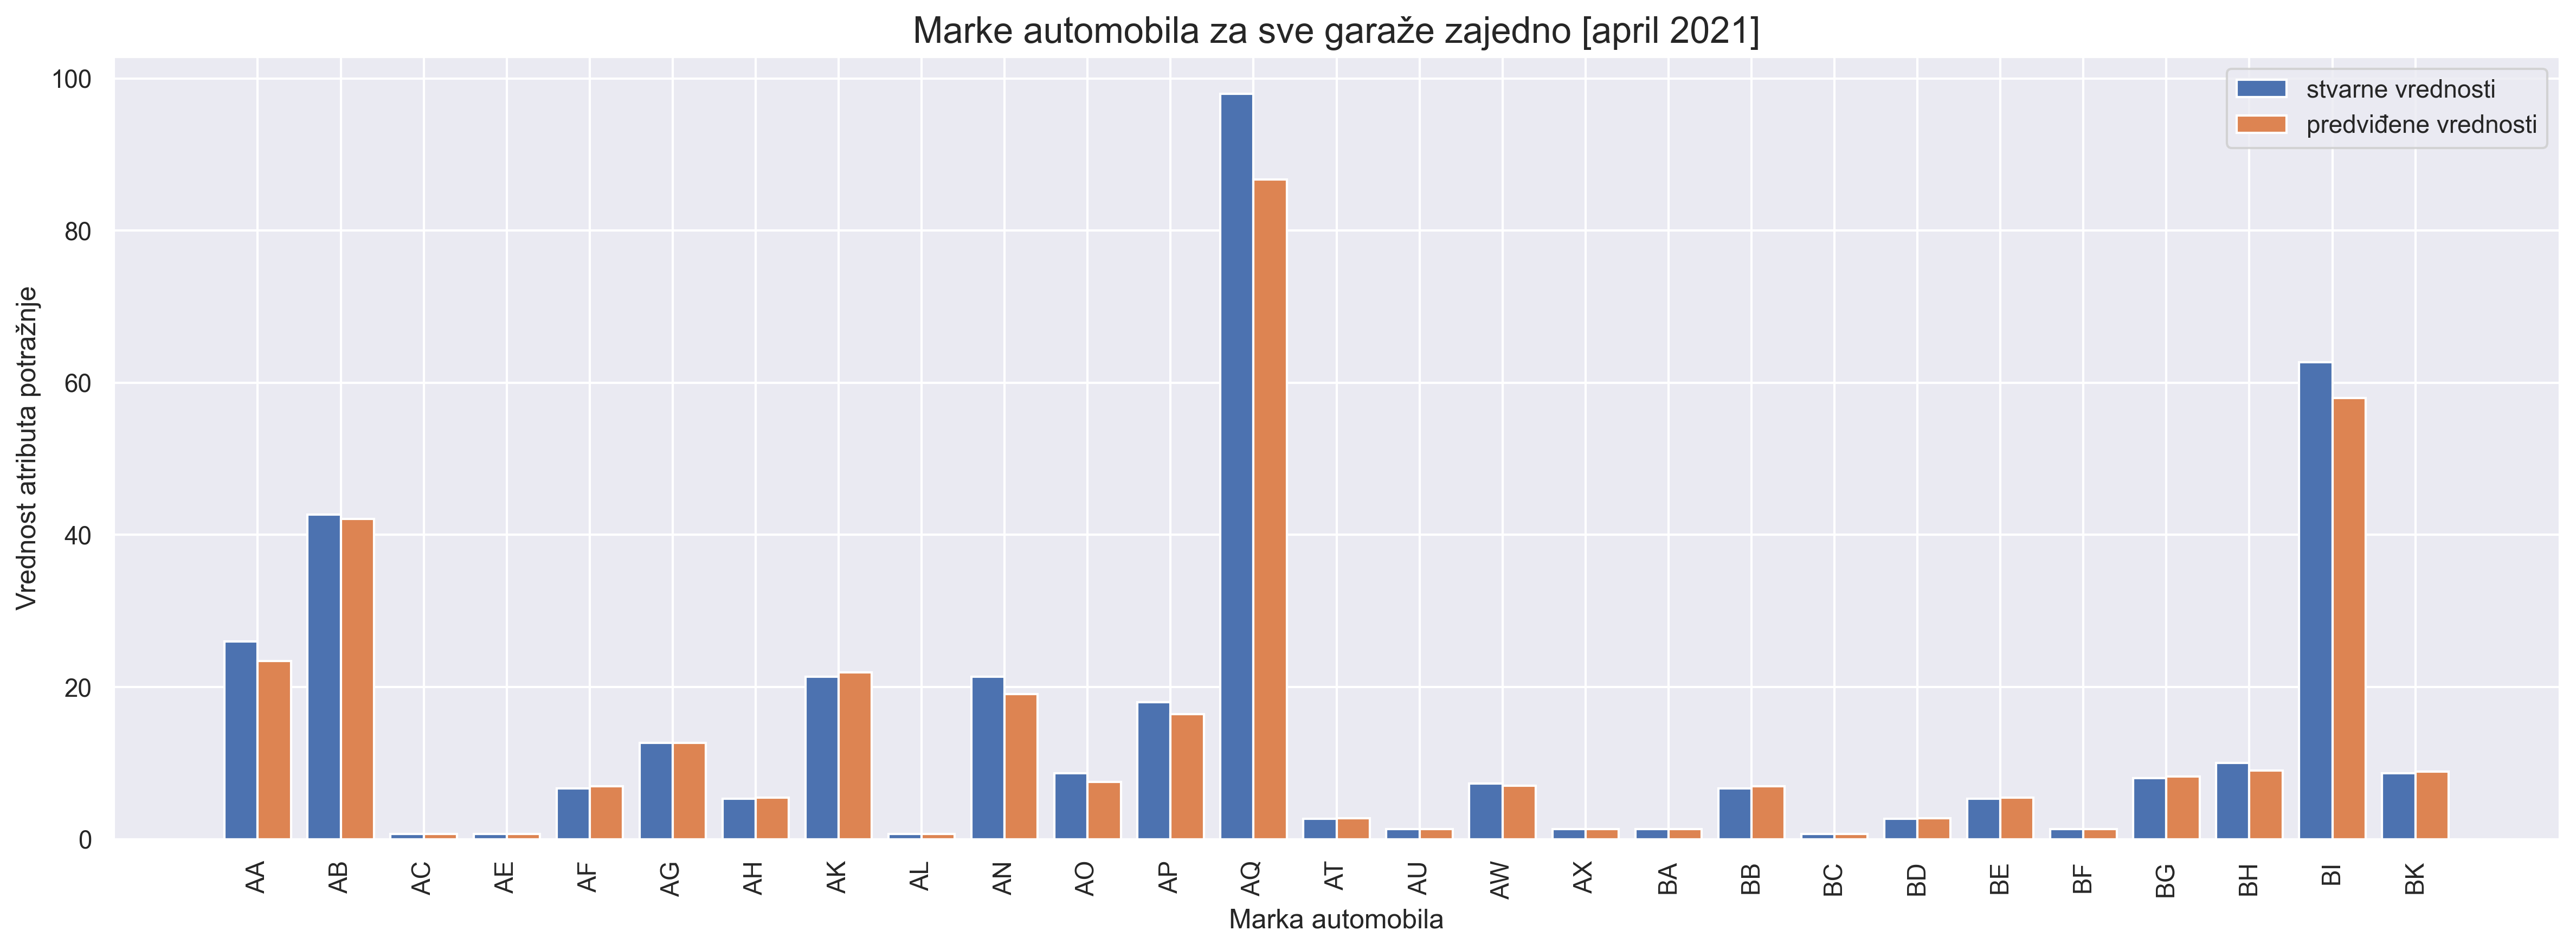

In [14]:
tmp_df = X_test[['vehicle_make', 'garage']]
tmp_df['demand_actual'] = y_test
tmp_df['demand_predicted'] = y_predicted
all_vehicles = tmp_df.groupby(by=['vehicle_make'])['demand_actual', 'demand_predicted'].agg('sum')

_X = np.arange(len(all_vehicles))

plt.figure(figsize=(16, 6), dpi=300)
plt.bar(_X - 0.2, all_vehicles['demand_actual'], 0.4, label='stvarne vrednosti')
plt.bar(_X + 0.2, all_vehicles['demand_predicted'], 0.4, label='predviđene vrednosti')
plt.xticks(_X, all_vehicles.index) 
plt.xticks(rotation=90)
plt.title("Marke automobila za sve garaže zajedno [april 2021]", fontdict={'fontsize': 16})
plt.ylabel("Vrednost atributa potražnje")
plt.xlabel("Marka automobila")
plt.tight_layout()
plt.legend()
# plt.savefig("year_month_garage_make_train_on_all_available_202104.eps", dpi=300)


In [15]:
from typing import Type, Any, List, Optional, Dict

class InvariantException(Exception):
    pass

def invariant(assertion: bool, error_message: str, error_type: Type[Exception] = InvariantException) -> None:
    if not assertion:
        raise error_type(error_message)

In [16]:
DEFAULT_WHITE_NOISE_PERCENTAGE = 0

def fit_impact_encoding(df: pd.DataFrame,
        covariates_to_encode: List[str],
        target_column: Optional[str] = None,
        white_noise_percentage: float = DEFAULT_WHITE_NOISE_PERCENTAGE
    ) -> Dict:
        normalized_target_column = target_column or ""

        invariant(
            len(normalized_target_column) > 0,
            "A non-empty and valid target column must be supplied",
            error_type=ValueError,
        )

        invariant(
            normalized_target_column in df.columns,
            f"Cannot impact encode on non-existing column {normalized_target_column}",
            error_type=ValueError,
        )

        population_metrics = df[normalized_target_column].mean()
        gaussian_noise_scale = population_metrics * (white_noise_percentage / 100.0)

        encodings = {}
        for covariate in covariates_to_encode:
            _df = df.copy()
            
            _df[covariate].replace('', np.nan, inplace=True)
            _df.dropna(subset=[covariate], inplace=True)
            _df[target_column] = _df[target_column] + np.random.normal(loc=0, scale=gaussian_noise_scale)
        
            _df = _df[[covariate, target]].groupby(covariate).agg(['mean', 'count'])
            _df.reset_index(inplace=True)
            _df = _df.rename(columns={"mean": "impact", "count": "cardinality"})
                   
            alpha = _df[target_column]["cardinality"].max()
            
            tmp_df = _df.copy()
            tmp_df = tmp_df.droplevel(0, axis='columns')
                        
            # regularizacija
            tmp_df['impact'] = (tmp_df['cardinality'] * tmp_df['impact'] 
                                        + alpha * population_metrics) / (tmp_df['cardinality'] + alpha)
    
            # normalizacija, da nove vrednosti mogu da se popune sa 1
            impact_mean = tmp_df['impact'].mean()            
            tmp_df['impact'] = tmp_df['impact'].apply(lambda x: x / impact_mean)
            tmp_df.columns = ["value", "impact", "cardinality"]
                        
            # alternativa: dict(zip(tmp_df['value'], tmp_df['impact']))
            encodings[covariate] = tmp_df[['value', 'impact']].to_dict(orient="list") 
        
        return encodings
     
def get_encoding(df_value, encodings, covariate):
    if df_value in encodings[covariate]['value']:
        index = encodings[covariate]['value'].index(df_value)
        return encodings[covariate]['impact'][index]
    else:
        return 1.0
    
def apply_impact_encoding(encodings: Dict, df: pd.DataFrame) -> pd.DataFrame:
        result = df.copy()
        
        for covariate, encoding_mapping_dict in encodings.items():
            if covariate not in result.columns:
                continue

            mapping_df = pd.DataFrame(encoding_mapping_dict).rename(columns={"value": covariate})
            
            result[covariate] = result[covariate].apply(get_encoding, args=(encodings, covariate))
        return result

In [17]:
metrics = {}
target = "demand_value"

for dataset_name, dataset in data.items():
    if dataset_name == "year_month_garage_make_train_on_all_available":

        covariates = list(dataset.columns)
        covariates.remove(target)
        covariates.remove("is_training_data")
        covariates.remove("x_units")

        X_train = data[dataset_name][
            data[dataset_name]['is_training_data'] == True
        ][covariates]

        X_test = data[dataset_name][
            data[dataset_name]['is_training_data'] == False
        ][covariates]

        y_train = data[dataset_name][
            data[dataset_name]['is_training_data'] == True
        ][target]

        y_test = data[dataset_name][
            data[dataset_name]['is_training_data'] == False
        ][target]

        columns_to_encode = []    
        if 'week' in dataset_name:
            if 'make' in dataset_name:
                columns_to_encode = ['vehicle_make', 'garage', 'year', 'week_of_year']
            else:
                columns_to_encode = ['vehicle_category', 'garage', 'year', 'week_of_year']
        else:
            if 'make' in dataset_name:
                columns_to_encode = ['vehicle_make', 'garage', 'year', 'year_week', 'month']
            else:
                columns_to_encode = ['vehicle_category', 'garage', 'year', 'year_week', 'month']

        model = xgb.XGBRegressor(**{"objective": "reg:squarederror"})

        X_train, X_validation, y_train, y_validation = model_selection.train_test_split(
            X_train,
            y_train,
            test_size=0.2,
            random_state=42
        )  

        tmp_df_encodings = X_train.copy()
        tmp_df_encodings[target] = y_train

        encodings = fit_impact_encoding(tmp_df_encodings, 
                                        columns_to_encode, 
                                        target)
        X_train_numeric = apply_impact_encoding(encodings, X_train)
        X_validation_numeric = apply_impact_encoding(encodings, X_validation)
        X_test_numeric = apply_impact_encoding(encodings, X_test)

        model = model.fit(
            X_train_numeric,
            y_train,
            eval_metric=["rmse"],
            eval_set=[(X_train_numeric, y_train), 
                      (X_validation_numeric, y_validation)
                     ],
            early_stopping_rounds=30,
            verbose=False
        )

        y_predicted = model.predict(X_test_numeric)

        mse, rmse, mae, r2 = regression_insights(y_test, y_predicted)
        smape_value = smape(y_test, y_predicted)

        metrics[dataset_name] = {'mse': mse, 'rmse': rmse, 'mae': mae, 'r2': r2, 'smape': smape_value}

In [18]:
pd.DataFrame(metrics).T

,mae,mse,r2,rmse,smape
year_month_garage_make_train_on_all_available,0.175464,0.111608,0.13199,0.334077,0.200943


/var/folders/p9/hzpq6sz513b6fgz_5cn7pyy00000gp/T/ipykernel_75778/1623269391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['demand_actual'] = y_test
/var/folders/p9/hzpq6sz513b6fgz_5cn7pyy00000gp/T/ipykernel_75778/1623269391.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['demand_predicted'] = y_predicted
/var/folders/p9/hzpq6sz513b6fgz_5cn7pyy00000gp/T/ipykernel_75778/1623269391.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be depreca

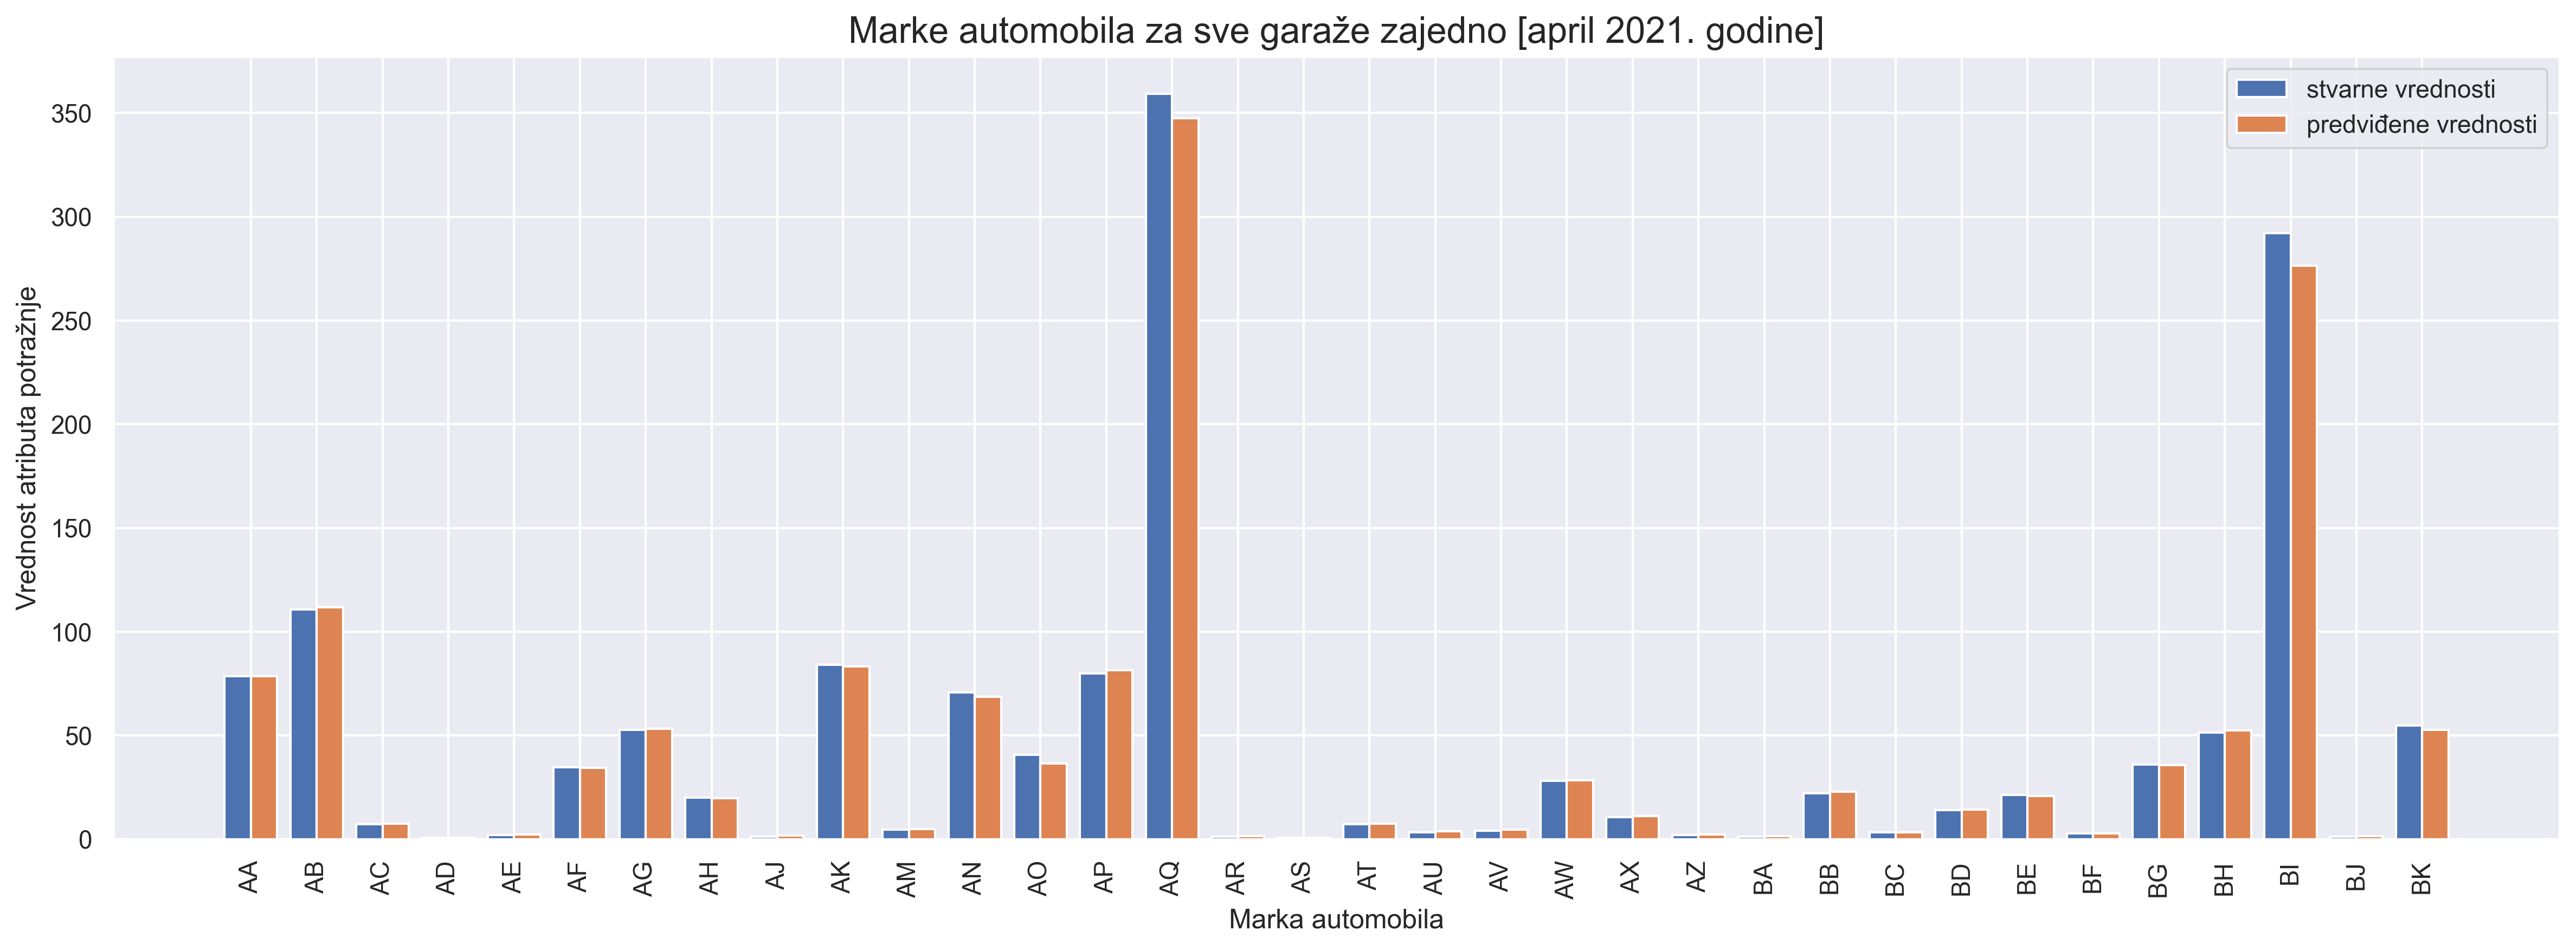

In [19]:
tmp_df = X_test[['vehicle_make', 'garage']]
tmp_df['demand_actual'] = y_test
tmp_df['demand_predicted'] = y_predicted
all_vehicles = tmp_df.groupby(by=['vehicle_make'])['demand_actual', 'demand_predicted'].agg('sum')

_X = np.arange(len(all_vehicles))

plt.figure(figsize=(16, 6), dpi=300)
plt.bar(_X - 0.2, all_vehicles['demand_actual'], 0.4, label='stvarne vrednosti')
plt.bar(_X + 0.2, all_vehicles['demand_predicted'], 0.4, label='predviđene vrednosti')
plt.xticks(_X, all_vehicles.index) 
plt.xticks(rotation=90)
plt.title("Marke automobila za sve garaže zajedno [april 2021. godine]", fontdict={'fontsize': 16})
plt.ylabel("Vrednost atributa potražnje")
plt.xlabel("Marka automobila")
plt.tight_layout()
plt.legend()
plt.savefig("../../grafici/year_month_garage_make_train_on_all_available_201204.eps", dpi=300)

In [21]:
model.feature_importances_

array([0.17561945, 0.27081597, 0.1033173 , 0.08238342, 0.09007411,
       0.07962024, 0.07185839, 0.12631118], dtype=float32)

In [23]:
data['year_month_garage_make_train_on_all_available']
covariates

['vehicle_make',
 'garage',
 'year_week',
 'reachable_population',
 'year',
 'month',
 'number_of_competitors',
 'x_unit_cost']

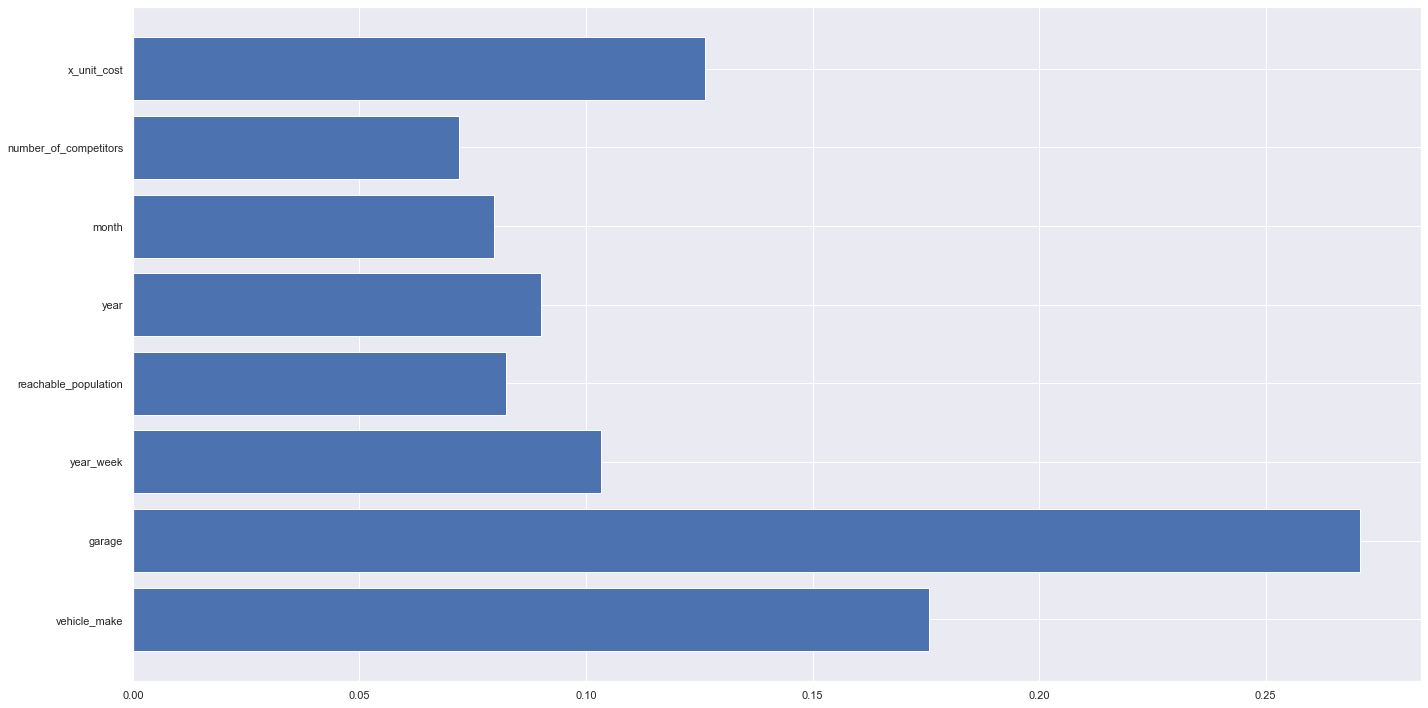

In [24]:
plt.figure(figsize=(20, 10))
plt.barh(covariates, list(model.feature_importances_))
plt.tight_layout()